In [5]:
using PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils

┌ Info: Precompiling MEngProject [d0493a11-efc0-4c7c-9b66-d0bd5a04cc55]
└ @ Base loading.jl:1260
┌ Warning: Package MEngProject does not have NNlib in its dependencies:
│ - If you have MEngProject checked out for development and have
│   added NNlib as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with MEngProject
└ Loading NNlib into MEngProject from project dependency, future warnings for MEngProject are suppressed.
ERROR: LoadError: LoadError: UndefVarError: LamKernels not defined
Stacktrace:
 [1] include(::Module, ::String) at ./Base.jl:377
 [2] include(::String) at /Users/niallcullinane/.julia/dev/MEngProject/src/MEngProject.jl:1
 [3] top-level scope at /Users/niallcullinane/.julia/dev/MEngProject/src/MEngProject.jl:2
 [4] include(::Module, ::String) at ./Base.jl:377
 [5] top-level scope at none:2
 [6] eval at ./boot.jl:331 [inlined]
 [7] eval(::Expr) at ./client.jl:449
 [8] top-lev

ErrorException: Failed to precompile MEngProject [d0493a11-efc0-4c7c-9b66-d0bd5a04cc55] to /Users/niallcullinane/.julia/compiled/v1.4/MEngProject/ixx4J_SsdeL.ji.

In [2]:
# matplotlib.rcParams["text.usetex"] = true

In [3]:
img = convert(Array{Float64,2}, load("../input_img/Iine_100_100_gs.png"));

In [117]:
const σ_1 = 1
const σ_2 = 0.5
const γ = 10;
const K = 12;

In [159]:
u_p = Laminart.I_u(img)
u_m = - u_p
v_p = fun_equ.(u_p)
v_m = fun_equ.(u_m)
v = relu.(v_p)-relu.(v_m)
V = exp(-1/8) .* imfilter(v, Kernel.gaussian(σ_2), "circular")

R = reshape(Array{eltype(V)}(undef, size(V)[1], size(V)[2]*K),size(V)[1],size(V)[2],K)
L = copy(R)

for k in 1:K
    θ = π*(k-1)/K
    R[:,:,k] = imfilter(V, relu.(LamKernels.kern_d(σ_2, θ)), "circular")
    L[:,:,k] = -imfilter(V, relu.(-LamKernels.kern_d(σ_2, θ)), "circular")
end

S_a = R .+ L
S_b = -abs.(R .- L)
S = γ .* relu.(S_a .+ S_b)
C = Laminart.fun_v_C(v_p, v_m, σ_2, K);

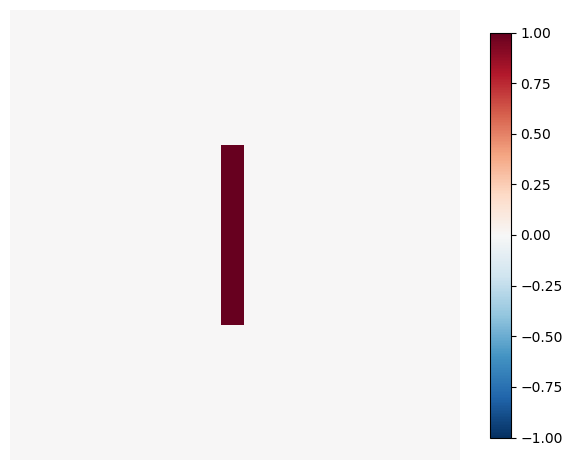

In [160]:
Utils.plot_rb(img, "img", true, -1, 1, true)

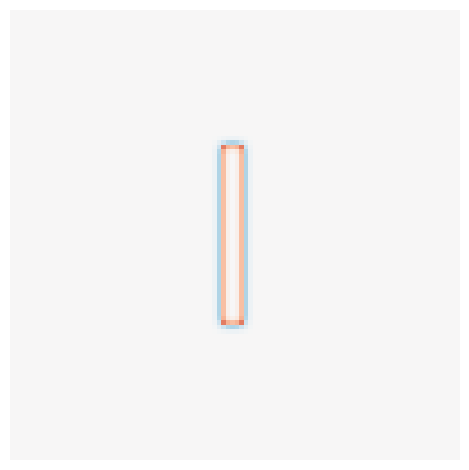

In [161]:
Utils.plot_rb(u_p)

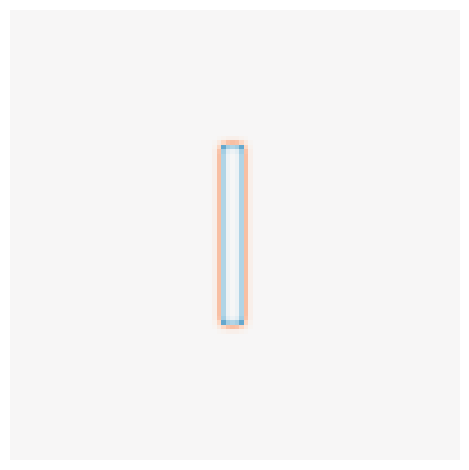

In [162]:
Utils.plot_rb(u_m)

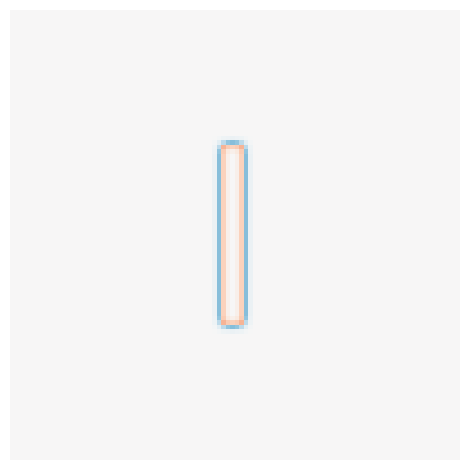

In [163]:
Utils.plot_rb(v_p)

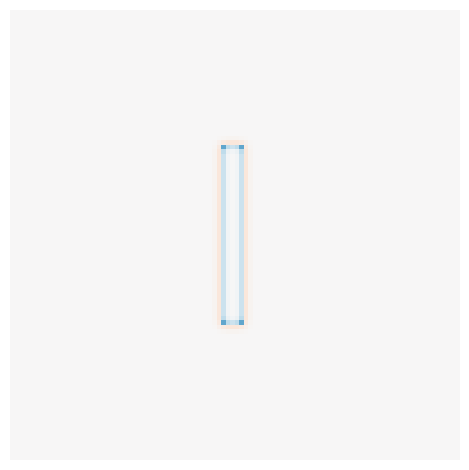

In [164]:
Utils.plot_rb(v_m,  "img", true, -2,2)

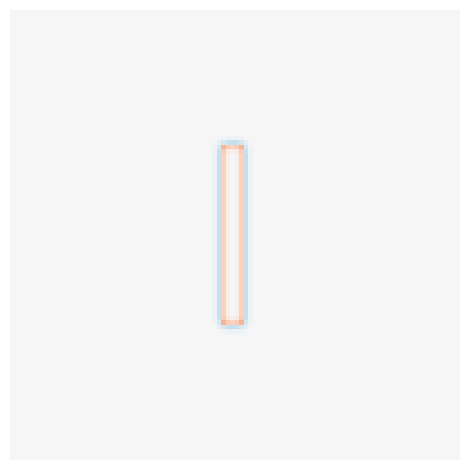

In [165]:
Utils.plot_rb(v)

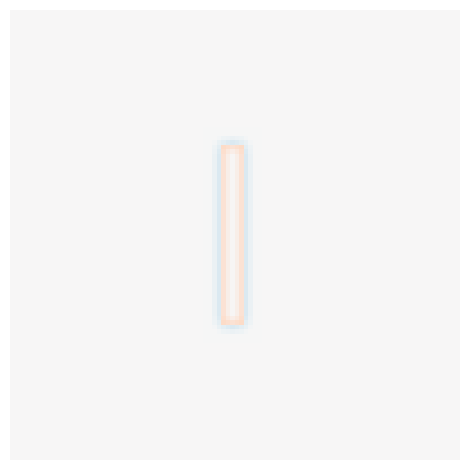

In [166]:
Utils.plot_rb(V)

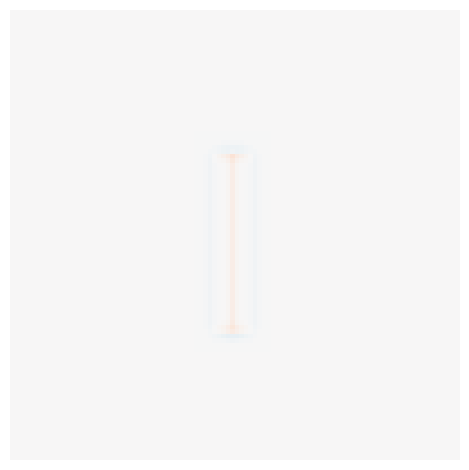

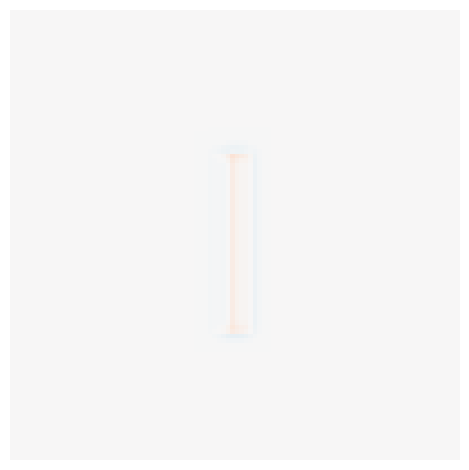

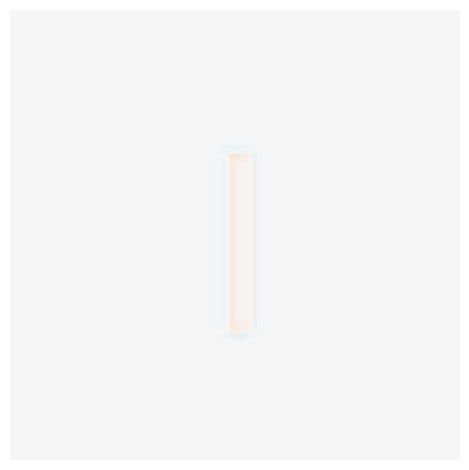

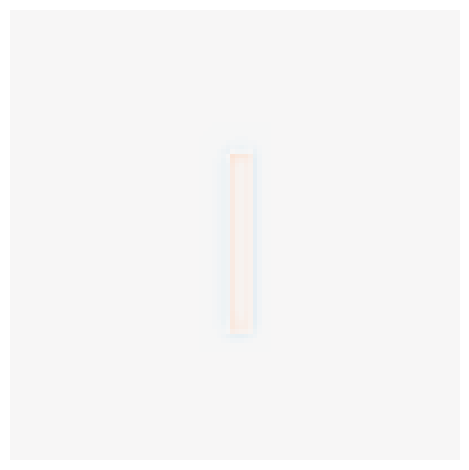

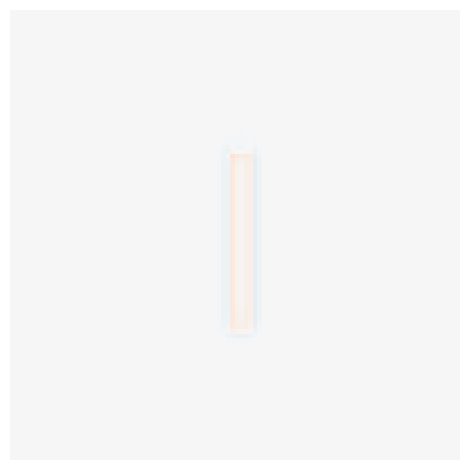

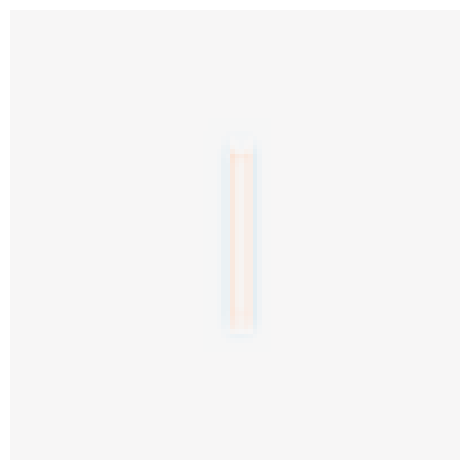

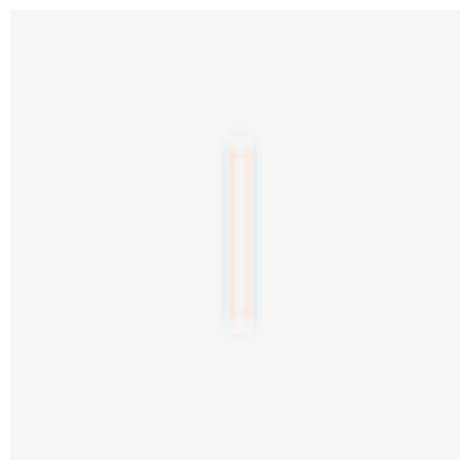

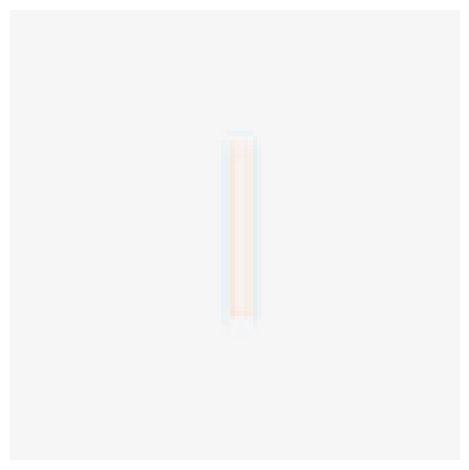

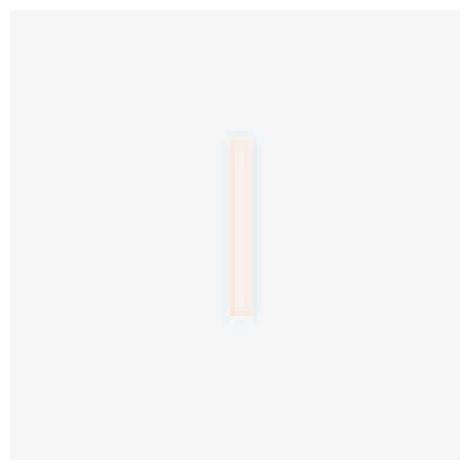

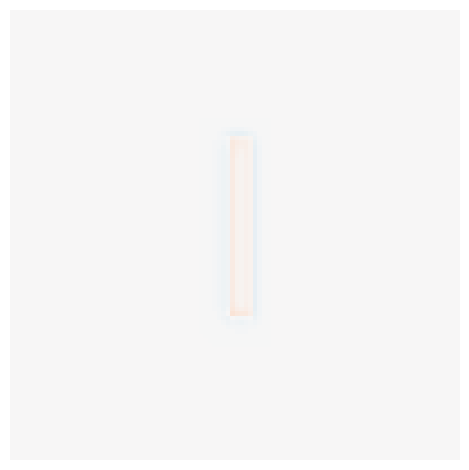

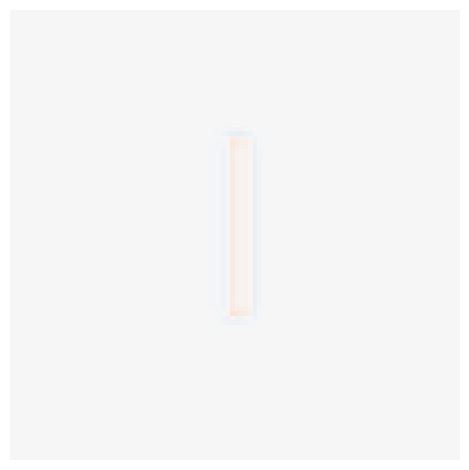

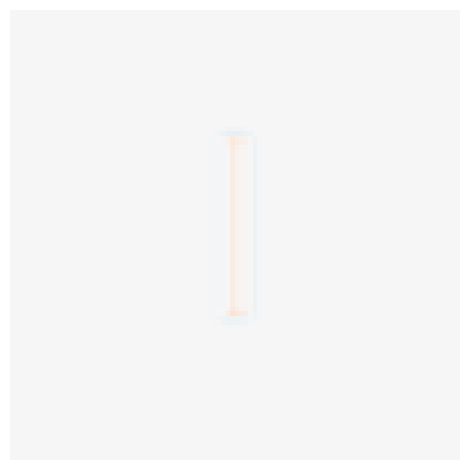

In [167]:
Utils.save_orientations_rb(R, "img")

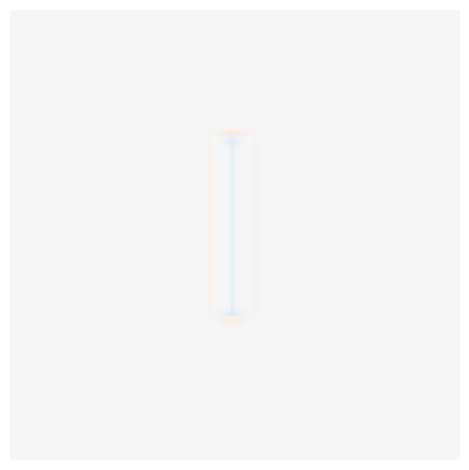

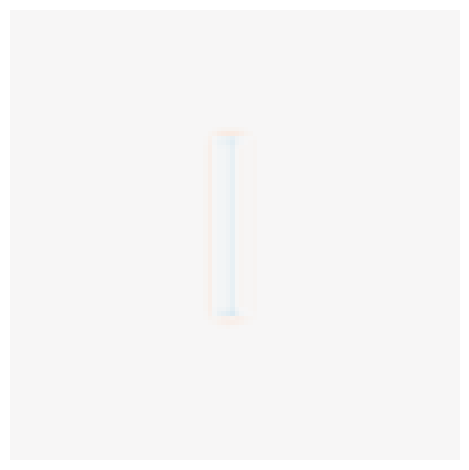

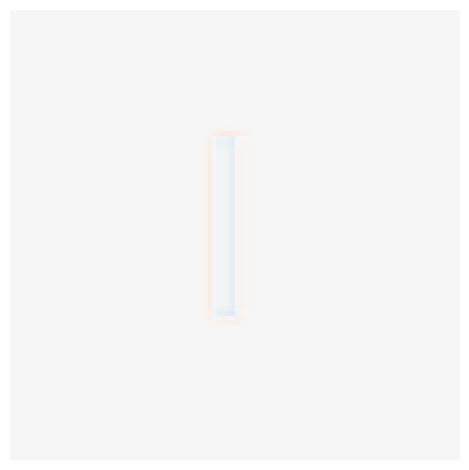

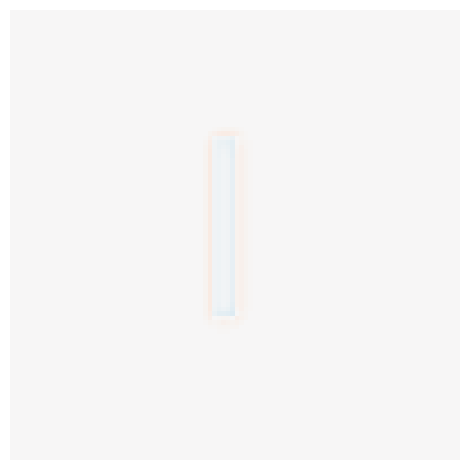

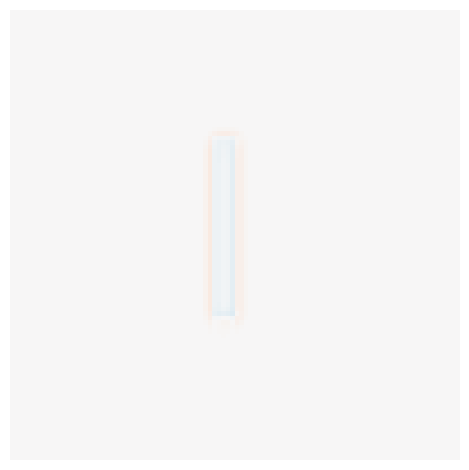

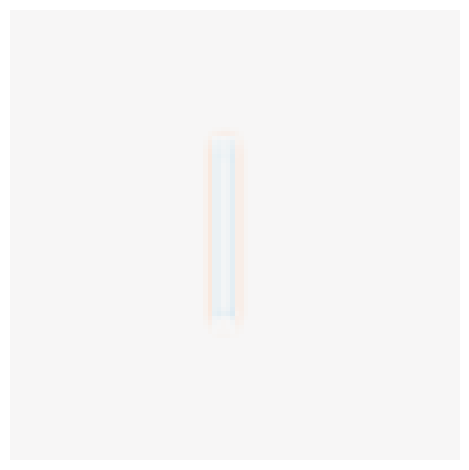

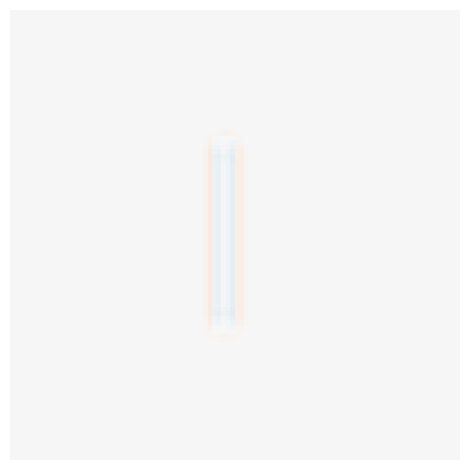

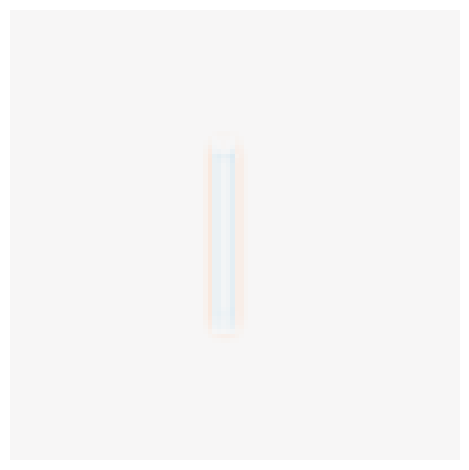

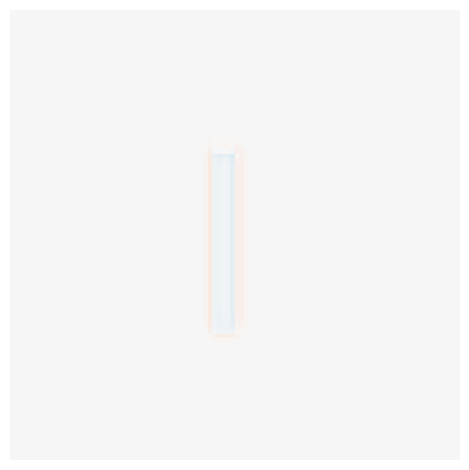

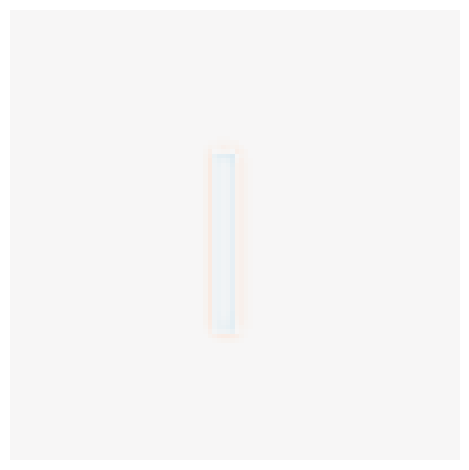

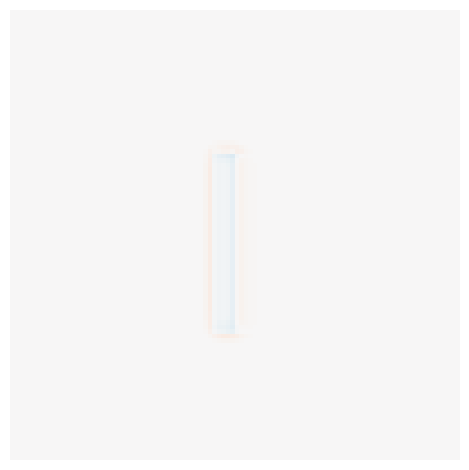

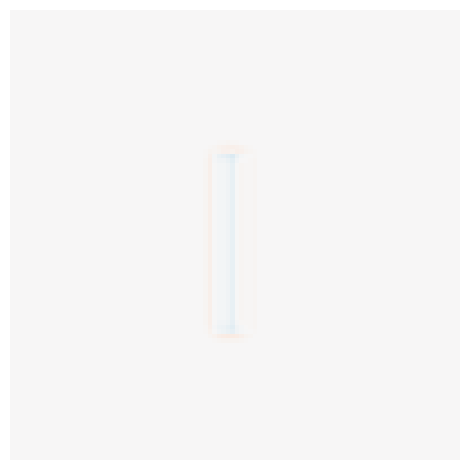

In [168]:

Utils.save_orientations_rb(L, "img")


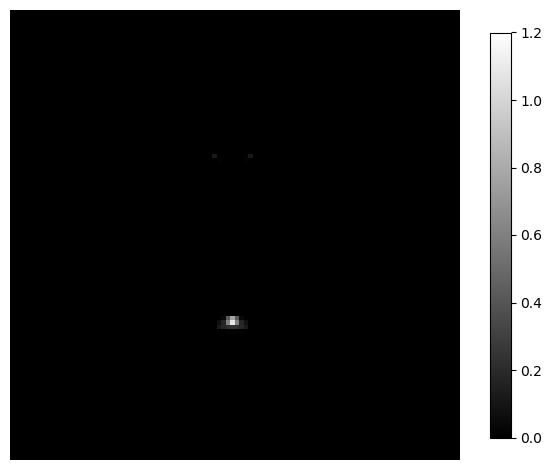

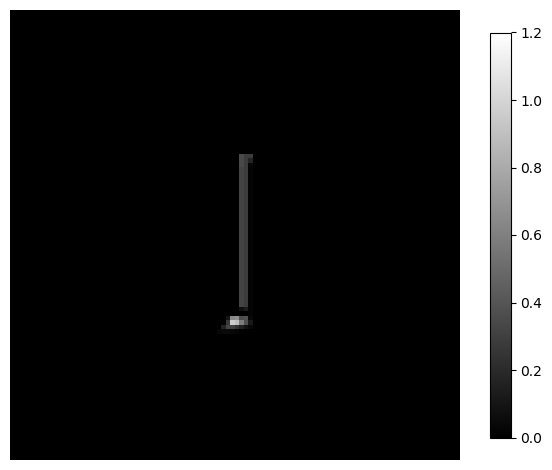

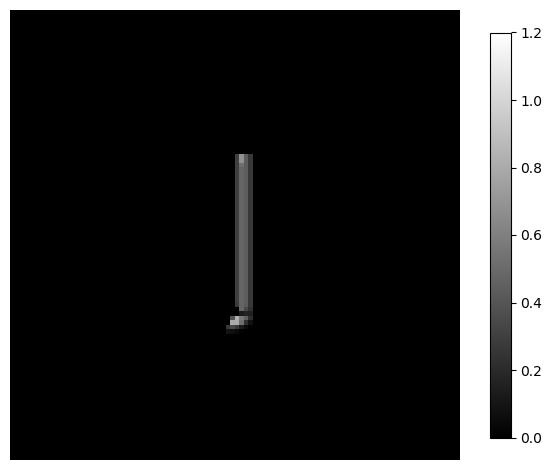

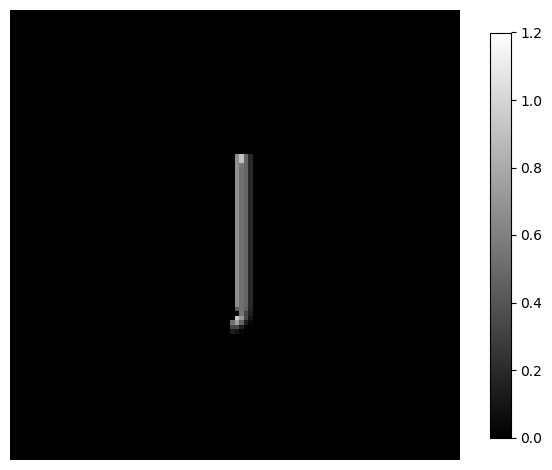

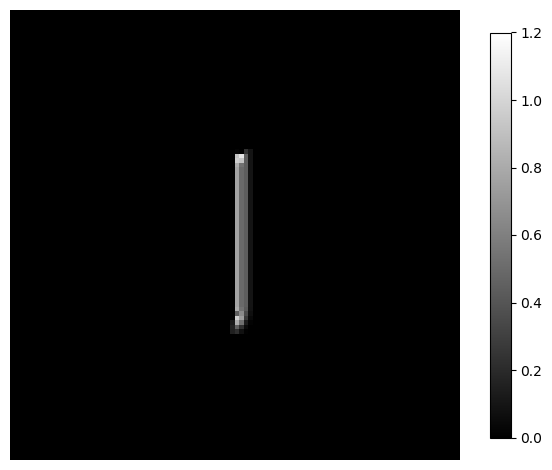

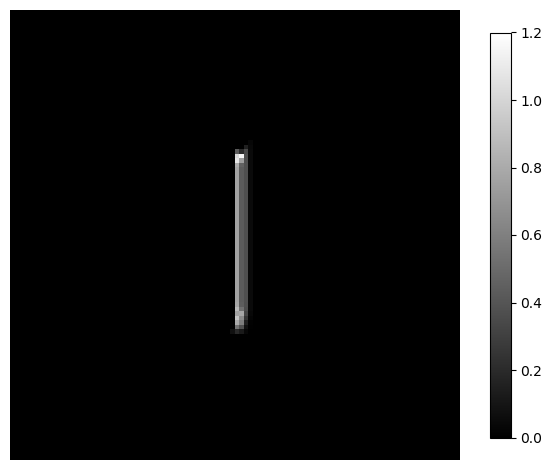

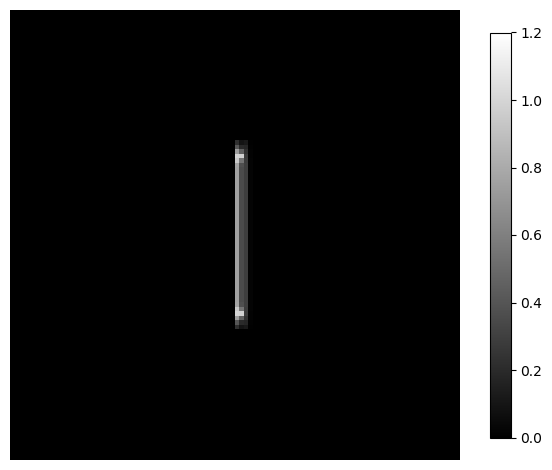

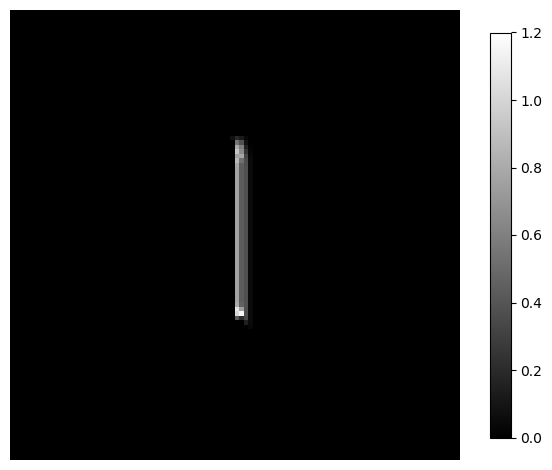

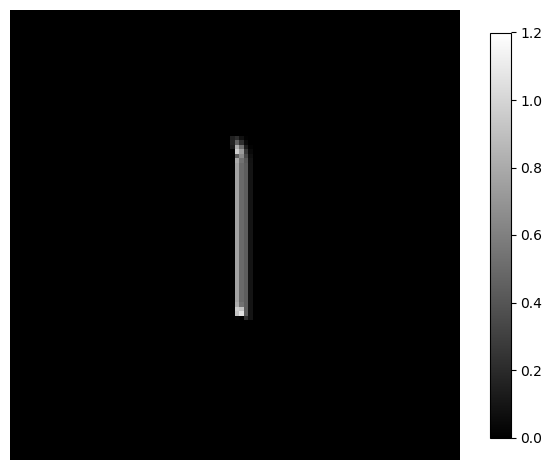

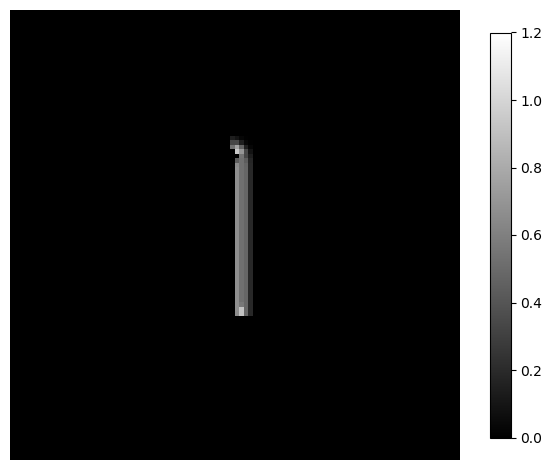

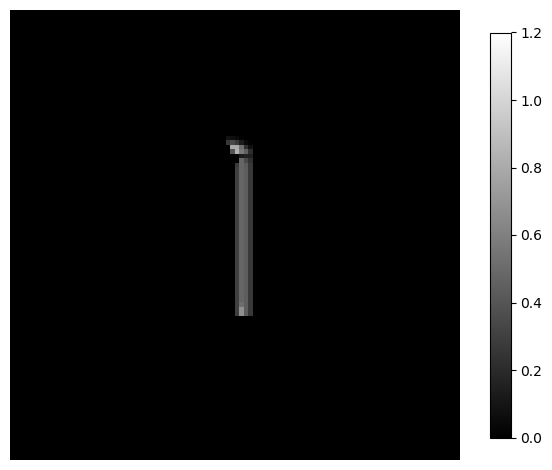

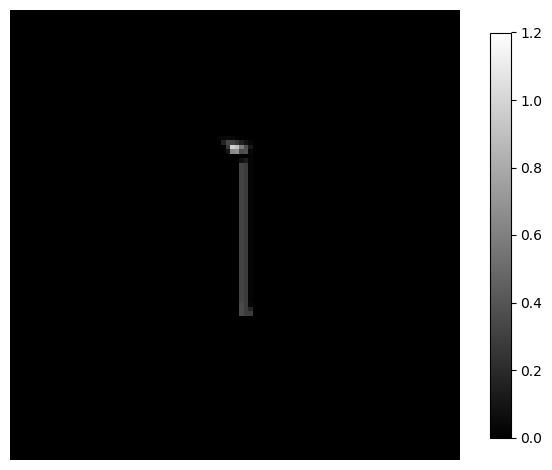

In [176]:

Utils.save_orientations_gs(S, "img",0,1.2,true)

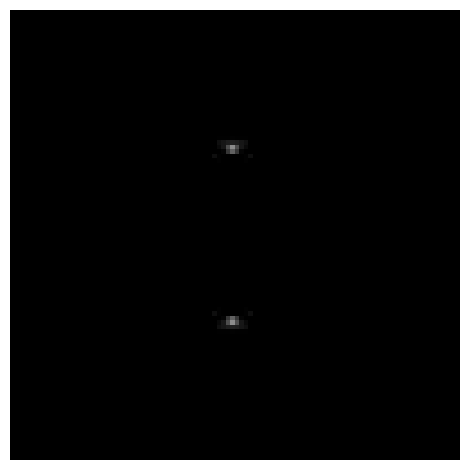

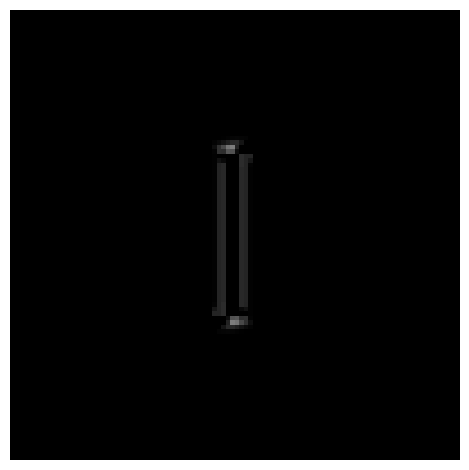

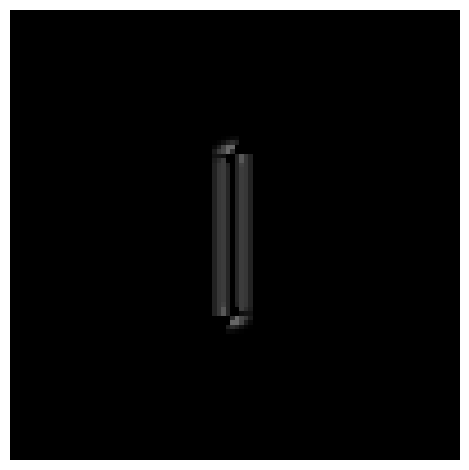

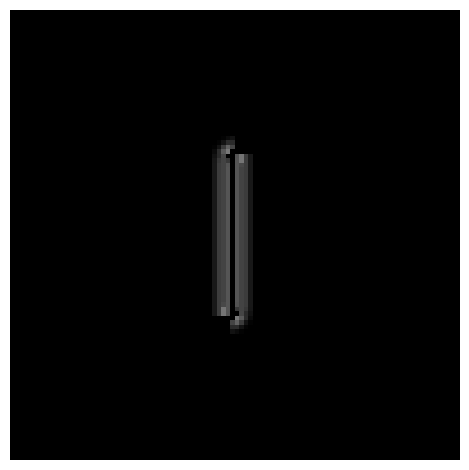

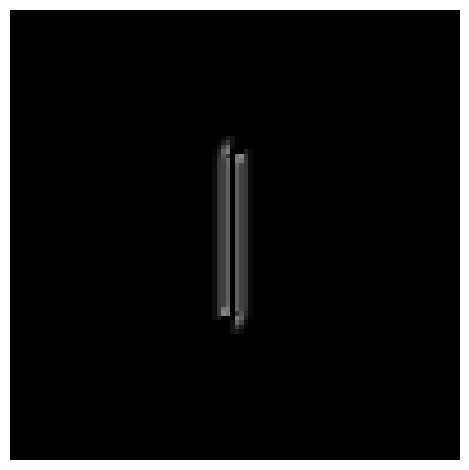

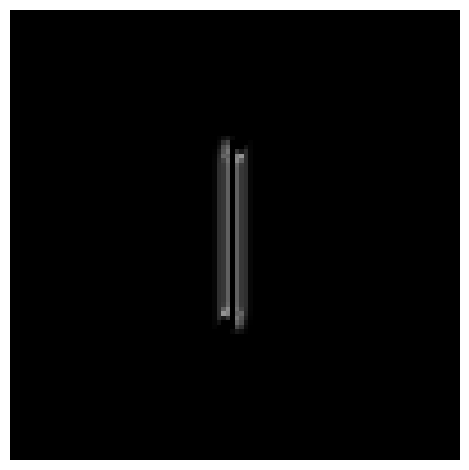

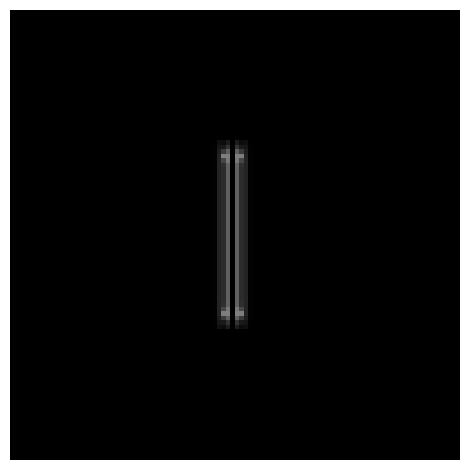

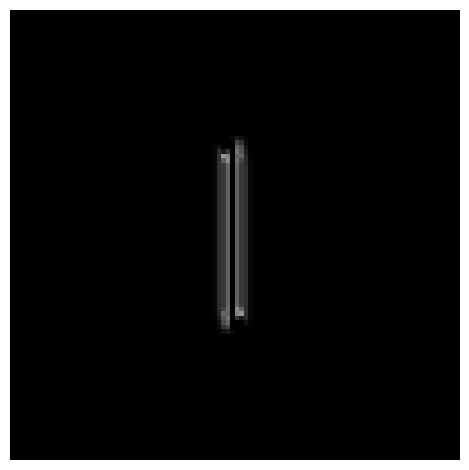

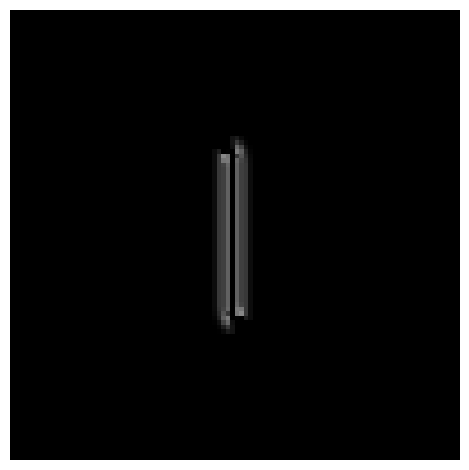

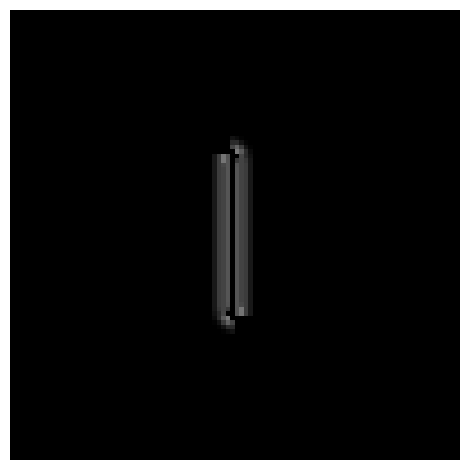

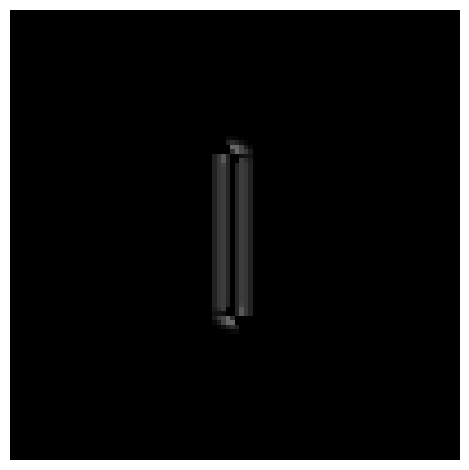

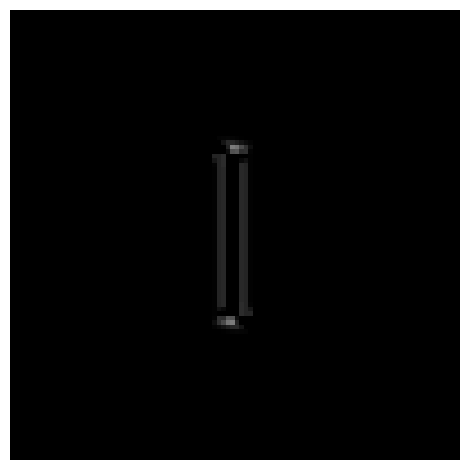

In [170]:
Utils.save_orientations_gs(C, "img", 0,2)

In [195]:
R_ = reshape(Array{eltype(V)}(undef, size(V)[1], size(V)[2],2*K),size(V)[1],size(V)[2],2*K)
L_ = copy(R_)

for k in 1:2*K
    θ = π*(k-1)/K
    R_[:,:,k] = imfilter(V, relu.(LamKernels.kern_d(σ_2, θ)), "circular")
    L_[:,:,k] = -imfilter(V, relu.(-LamKernels.kern_d(σ_2, θ)), "circular")
end

S_a_ = R_ .+ L_
S_b_ = -abs.(R_ .- L_)
S_ = γ .* relu.((S_a_ .+ S_b_));

In [205]:
C_ = reshape(Array{eltype(V)}(undef, size(V)[1], size(V)[2],K),size(V)[1],size(V)[2],K)

for k in 1:K
    C_[:,:,k] = S_[:,:,k] .+ S_[:,:,k+K]  
end

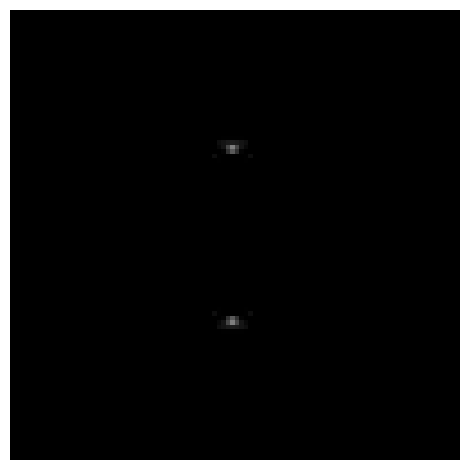

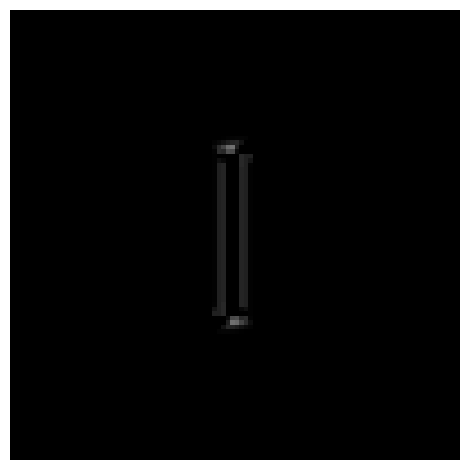

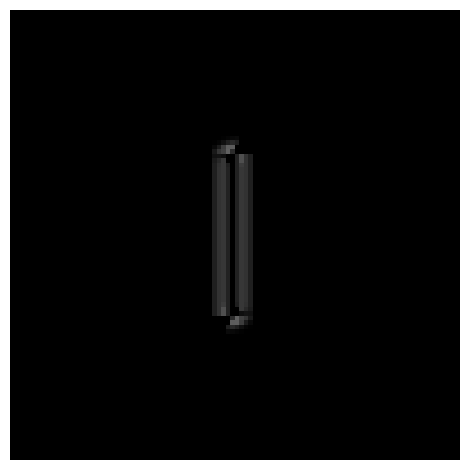

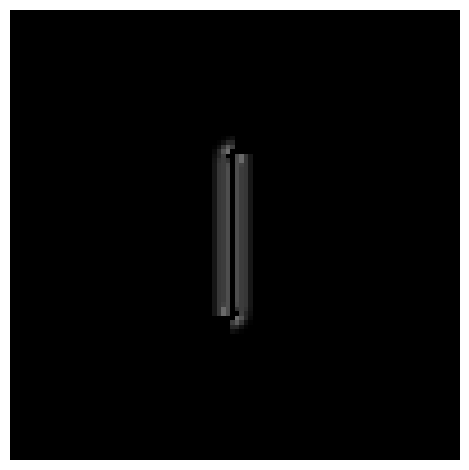

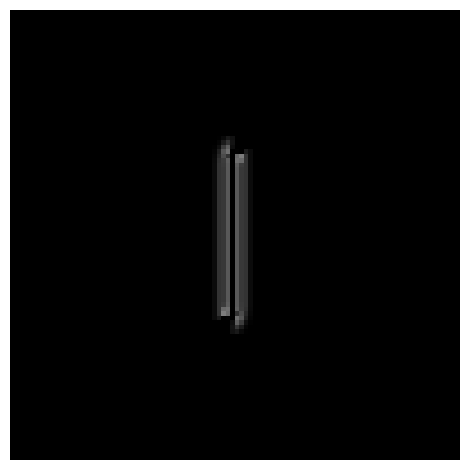

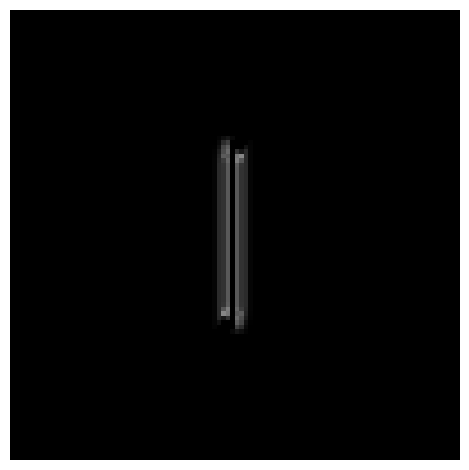

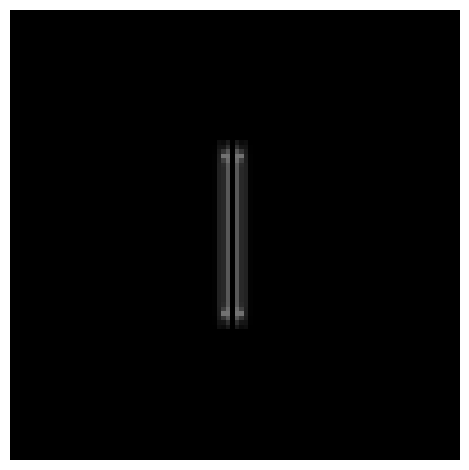

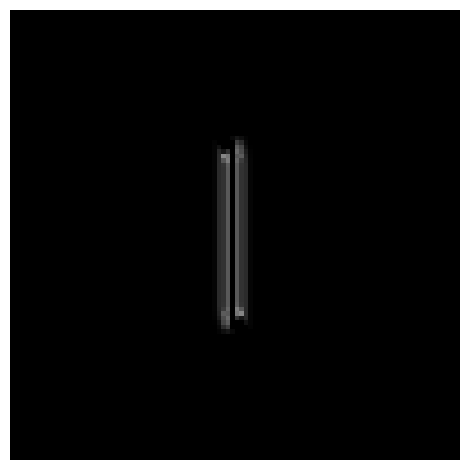

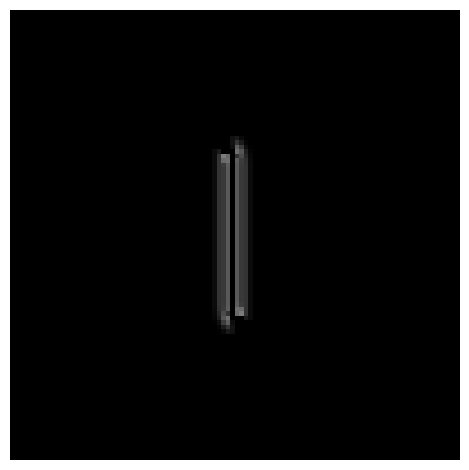

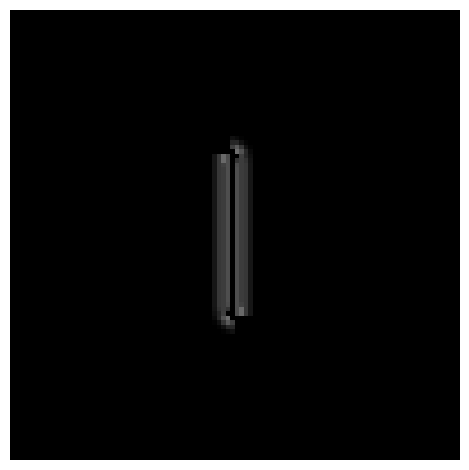

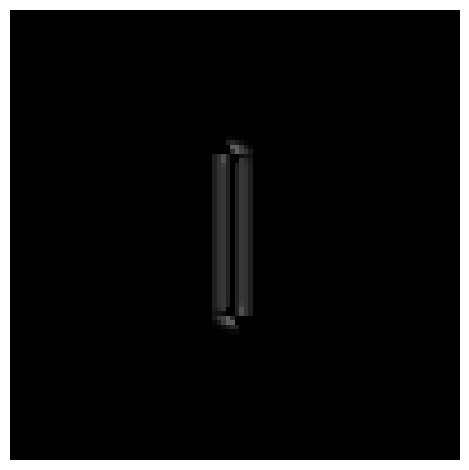

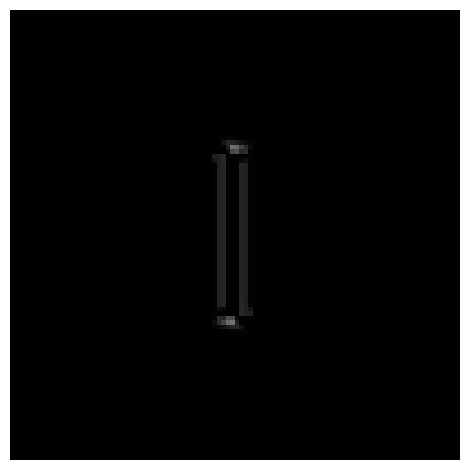

In [207]:
Utils.save_orientations_gs(C_, "img", 0, 2.2)

In [212]:
findmax(abs.(C-C_))

(1.2490009027033011e-15, CartesianIndex(67, 48, 12))